<a href="https://colab.research.google.com/github/amanraj993920-arch/Aman-Raj/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Predictions**
#by Aman Raj

Survival Prediction of Titanic ship is one of the famous beginner projects where we will be learning mathods and procedures for finding the insight and discover new fats and prediction based on that ML models.

#**Contents:**
1. Imports Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File

#Any and all feedback is welcome!



#**1)** Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas,matplotib and seaborn.

In [3]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#**2)** Read in and Explore the Data
It's time to read in our training and testing data using pd.read_cvs, and take a frist look at the training data using the describe () function

In [4]:
#impot train and test CSV files
train = pd.read_csv('/content/train.csv')    # tarin = pd.read_csv(r"c:Desktop/File_Address/train.csv")
test = pd.read_csv('/content/test.csv')

#take a look at the traning data
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#**Data Analysis**
We're going to consider the features in the dataset and how complete they are:

In [5]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


#**.   Numerical Features:**   Age (Continuous), Fare (Continuous), SibSp (Discrete), Prach (Discrete)
#**.   Categorical Features:** Survived, Sex, Embarked, Pclass
#**.  Alphanumeric Features:** Ticket, Cabin


#**What are the data types for each feature?**
#**.**  Survived: int
#**.**  Pclass: int
#**.**  Name: string
#**.**  Sex: string
#**.**  Age: float
#**.**  SibSp: int
#**.**  Parch: int
#**.**  Ticket: string
#**.**  Fare: float
#**.**  Cabin: string
#**.**  Embarked: string

**Now that have an idea of what kinds of features we're working with, we can how much information we have about each of them.**


In [7]:
#see a summary of the training dataset
train.describe(include = "all")
#train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#**Some Observation**:
* There are a total of 891 passangers in our training.
* The age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to surviavl, so we sholud probably attempt to fill these gaps.
* The Cabin feature is missing approximately 77.1% of its values. Since
so much  of the feature is missing. It would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [8]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that except for the abovementioned missing values, no NaN values exist.

# **Some Predictions:**
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

#**4) Data Visualization**
It's time to visualize our data so we can see whether our predictions were accurate!

# **Sex Feature**

Percentage of females who srevived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


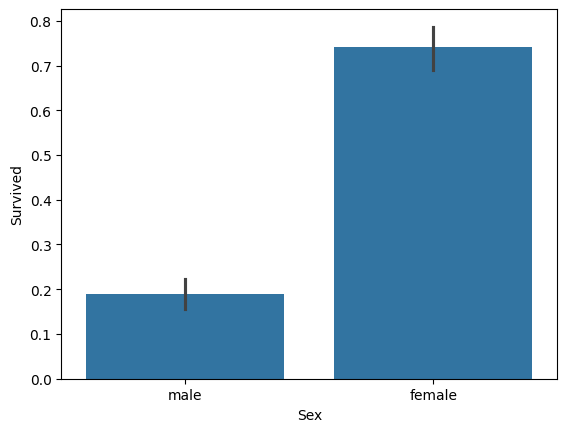

In [9]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print precentages of females vs. males that survive
print("Percentage of females who srevived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

#**Pclass Feature**

Percentage of passengers in first class who survived: 62.96296296296296
Percentage of passengers in second class who survived: 47.28260869565217
Percentage of passengers in third class who survived: 24.236252545824847


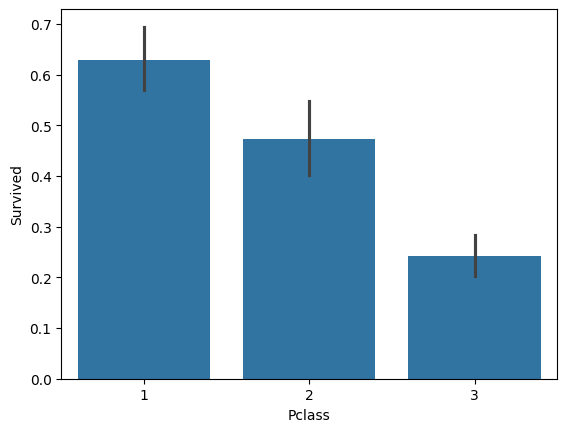

In [10]:
#draw a bar plot of survival by pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print precentages of females vs. males that survive
print("Percentage of passengers in first class who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of passengers in second class who survived:", train["Survived"][train["Pclass"] == 2].value_counts(
      normalize = True)[1]*100)

print("Percentage of passengers in third class who survived:", train["Survived"][train["Pclass"] == 3].value_counts(
      normalize = True)[1]*100)

As predicted, people with higher socioeconomic class had a higher rate of survival.(62.9% vs 47.3% vs 24.2%)

#**SibSp Feature**

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived 53.588516746411486
Percentage of SibSp = 2 who survived 46.42857142857143


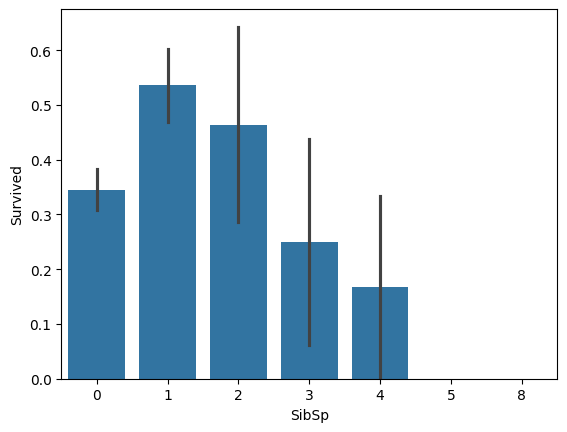

In [11]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In genreal, it's clear that people with more siblings or spouses aboard wre less likely to survive. However, contrary to expectations, people with no siblings or spouses wre less to likely to survive than those with one or two. (34.5% vs 53.4% vs 46.4%)

# **Prach Feature**

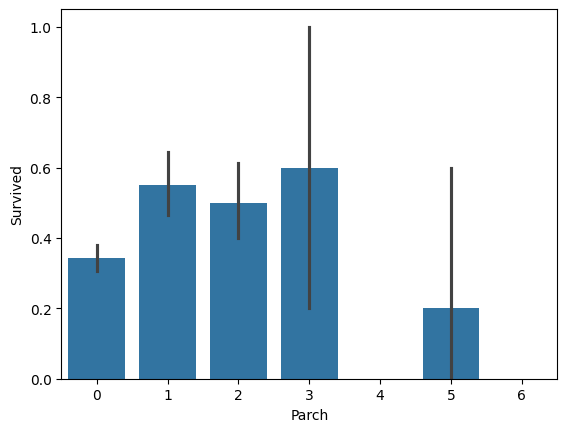

In [12]:
#draw a plot for parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traviling alone are less likely to survive than those with 1-3 parents or children.

# **Age Feature**

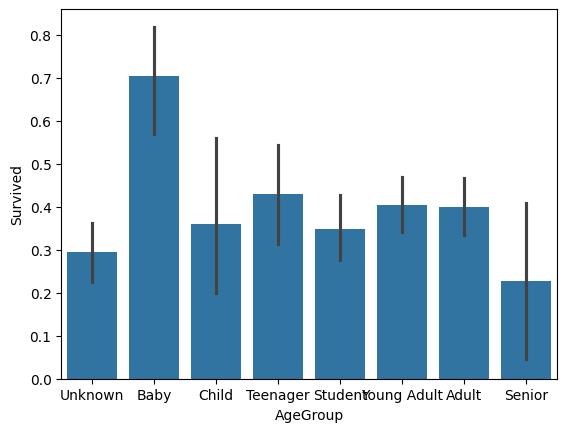

In [13]:
#sort the age into Logical categories
train["Age_Original"] = train["Age"].copy() # Keep original Age for reference
test["Age_Original"] = test["Age"].copy() # Keep original Age for reference

train["Age"].fillna(-0.5, inplace=True)
test["Age"].fillna(-0.5, inplace=True)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Baby are more likely to survive than any other age group.

# **Cabin Feature**

I think the idea here is that people with recoarded cabin numbers are higher socioecononic class, and thus more likely to survive.

Percentage of CabinBOol = 1 who survive: 66.66666666666666
Percentage of CabinBool = 0 who survive: 29.985443959243085


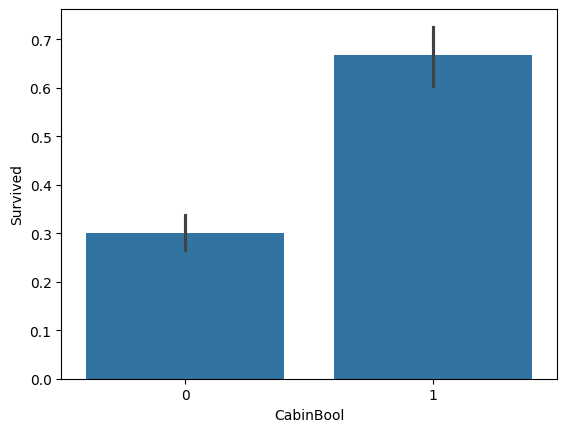

In [14]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBOol = 1 who survive:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of CabinBool = 0 who survive:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#Draw a bar plot of CabinBool vs. Servival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

PEople with a recoard Cabin number are, in fact, more likely to survive.(66.6% vs 29.9%)

#**5) Cleaning Data**

Time to clean our data to account for missingvalues and unnecessary information!

**Looking at the Test Data**

Let's see how our data looks!

In [15]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Original,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,332.000000,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN,8,NaN
top,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,30.272590,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,14.181209,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.170000,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,21.000000,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,27.000000,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,39.000000,NaN,0.000000


*  We have totwl of 418 passengers.
*  1 value fro, the Fare feature is missing
*  Around 20.5% 0f the Age feature is missing. We will to fill that in.

#**Cabin Feature**

In [66]:
#we'll start of by dropping the cabin feeature scince not a lot more useful information can be extracted from it.
train = train#.drop(['Cabin'], axis=1)
test = test#.drop(['Cabin'], axis=1)

# **Ticket Feature**

In [45]:
#we can also drop the Ticket feature since it's unlikely to yeild any useful information
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

# **Embarked Feature**

In [18]:
#now we need to fill in the missing values in the Emarked feature
print("Number of people embarking in SOuthampton (s):")
southampthon = train[train["Embarked"] == "S"].shape[0]
print(southampthon)

print("Number of people embarking in Cherbourg (c):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in SOuthampton (s):
644
Number of people embarking in Cherbourg (c):
168
Number of people embarking in Queenstown (q):
77


It's clear that the majority of people embarked in Southampton (s). Let's go ahead and fill in the missing values with S.

In [52]:
#replacing the missing values in the Embarked feature with S
train['Embarked'] = train['Embarked'].fillna("S")

# **Age Feature**

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [20]:
#create a combined group of both datasets
combine = [train, test]

#extract a little for each Name in the train and test datasets
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
#replace value titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [22]:
#map each of the title groups to numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Original,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Young Adult,0,1


The code I used above is researched and reffered from Kaggle and GitHub. Next, we'll try to predict the missing Age values from the most common age for their Title.

In [23]:
#fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rae_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using  .map(), but couldn't.
#I've put down a less elegent, temporary solution for now.
#train = train.fillna({"Age": train["Tilte"].map(age_tilte_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
       train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
       test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now that we've filled in the missing values at least somewhat accurately(I will work on a better way for predicting missing age values). It's time to map each age group to a numerical value.

In [24]:
#map each AgeGroup value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7, 'Unknown': 0} # Added 'Unknown' mapping
train['AgeGroup_Numeric'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup_Numeric'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train=train.drop(['Age'], axis = 1)
test=test.drop(['Age'], axis = 1)

# **New Feature**

We can drop the name feature now that we've extracted the titles.

In [25]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

# **Sex Feature**

In [26]:
#map each Sex value to anumerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Original,AgeGroup,CabinBool,Title,AgeGroup_Numeric
0,1,0,3,0,1,0,A/5 21171,7.2500,NaN,S,22.0,Student,0,1,4
1,2,1,1,1,1,0,PC 17599,71.2833,C85,C,38.0,Adult,1,3,6
2,3,1,3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Young Adult,0,2,5
3,4,1,1,1,1,0,113803,53.1000,C123,S,35.0,Young Adult,1,3,5
4,5,0,3,0,0,0,373450,8.0500,NaN,S,35.0,Young Adult,0,1,5


# **Emabarked Feature**

In [56]:
#map each Embarked value to a numarical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

# Apply mapping and ensure all original columns are kept
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

# Reassign train and test to include all columns
train = train[train.columns] # This line is effectively a no-op but makes the intent clear
test = test[test.columns]   # Ensure all columns are included in the test DataFrame after mapping

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Original,AgeGroup,CabinBool,Title,AgeGroup_Numeric,FareBand
0,1,0,3,0,1,0,1,22.0,Student,0,1,4,1
1,2,1,1,1,1,0,1,38.0,Adult,1,3,6,4
2,3,1,3,1,0,0,1,26.0,Young Adult,0,2,5,2
3,4,1,1,1,1,0,1,35.0,Young Adult,1,3,5,4
4,5,0,3,0,0,0,1,35.0,Young Adult,0,1,5,2


# **Fare Feature**

It's time seperate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [35]:
#fill in missing Fare value in test set based on mean fare for that Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

#mapFare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

In [36]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Original,AgeGroup,CabinBool,Title,AgeGroup_Numeric,FareBand
0,1,0,3,0,1,0,A/5 21171,NaN,NaN,22.0,Student,0,1,4,1
1,2,1,1,1,1,0,PC 17599,C85,NaN,38.0,Adult,1,3,6,4
2,3,1,3,1,0,0,STON/O2. 3101282,NaN,NaN,26.0,Young Adult,0,2,5,2
3,4,1,1,1,1,0,113803,C123,NaN,35.0,Young Adult,1,3,5,4
4,5,0,3,0,0,0,373450,NaN,NaN,35.0,Young Adult,0,1,5,2


In [37]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_Original,AgeGroup,CabinBool,Title,AgeGroup_Numeric,FareBand
0,892,3,0,0,0,330911,NaN,3,34.5,Young Adult,0,1,5,1
1,893,3,1,1,0,363272,NaN,1,47.0,Adult,0,3,6,1
2,894,2,0,0,0,240276,NaN,3,62.0,Senior,0,1,7,2
3,895,3,0,0,0,315154,NaN,1,27.0,Young Adult,0,1,5,2
4,896,3,1,1,1,3101298,NaN,1,22.0,Student,0,3,4,2


# **6) Choosing the Best Model**

# Splitting the Training Data

We will use part of our training data(22% in this case) totest the accuracy of our diffrent models.

In [57]:
from sklearn.model_selection import train_test_split

# Drop the AgeGroup, Age_Original, and AgeGroup_Numeric columns as we've used AgeGroup_Numeric for age
predictors = train.drop(['Survived', 'PassengerId', 'AgeGroup', 'Age_Original', 'AgeGroup_Numeric'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# Testing Different Models

I will be testing the following models with my training data(got the list from here):
  * Gaussian Naive Bayes
  * LOgistic Regression
  * Support Vector Machines
  * Perceptron
  * Decision Tree Classifier
  * Random Forest Classifier
  * KNN or k-Nearest Neighbors
  * Stochastic Gradient Descent
  * Gradient Boosting Classifier
  
For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [61]:
# Gaussian Navie Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.17


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.66


In [49]:
print(predictors.isnull().sum())

Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked     891
CabinBool      0
Title          0
FareBand       0
dtype: int64


In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.66


In [59]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

80.71


In [67]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [69]:
# DEcision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decision_tree)

82.23


In [72]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.17


In [74]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.16


In [75]:
# DEcision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decision_tree)

82.23


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_val)
acc_random_forest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_random_forest)

84.26


In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

73.6


In [78]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.68


In [79]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(x_val)
acc_gradient_boosting = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gradient_boosting)

82.23


# **Comparing Models**
Let's compare the accuracy of each model to determine the best one for our predictions.

In [86]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Descent', 'Linear SVC',
              'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_gradient_boosting]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.26
9,Gradient Boosting Classifier,82.23
8,Decision Tree,82.23
0,Support Vector Machines,80.71
6,Stochastic Gradient Descent,78.68
4,Naive Bayes,78.17
7,Linear SVC,78.17
2,Logistic Regression,77.66
5,Perceptron,77.16
1,KNN,73.60


# **7) Creating Submission File**
Now we will use the best performing model, Random Forest, to predict survival on the test data and create the submission file.

In [85]:
# Create the submission file
test_pred = random_forest.predict(test.drop(['PassengerId', 'AgeGroup', 'Age_Original', 'AgeGroup_Numeric'], axis=1))

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_pred
})

submission.to_csv('titanic_submission.csv', index=False)

# **Thank you !**